<a href="https://colab.research.google.com/github/ramdarsh/Assignments/blob/main/Text_mining_E_commerce_website.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment Text mining E-Commerce Website

In [1]:
!pip install beautifulsoup4

In [2]:
pip install requests-html

## Install and Import Beautifull Soap

In [3]:
#from urllib.request import urlopen

In [4]:
#reviews=soup.find_all('div',{'data-hook':'review'})

In [5]:
#r=s.get(url)

In [6]:
from requests_html import HTMLSession

In [7]:
import requests

In [8]:
import pandas as pd

In [9]:
from bs4 import BeautifulSoup

In [10]:
import seaborn as sns

In [11]:
def getnextpage(soup):
    page=soup.find()

In [12]:
s=HTMLSession()

In [13]:
url='https://www.amazon.in/Sparx-Flops-Thong-Sandals-8-SF0541G/product-reviews/B078HXTTCC/ref=cm_cr_getr_d_paging_btm_prev_1?ie=UTF8&reviewerType=all_reviews&pageNumber=1'

# Functions to get the content of the required reviews and pages of website

In [14]:
def getamazon(url):

    soup=BeautifulSoup(r.text,'html.parser')
    return soup

In [15]:
def get_soup(url):

    r=s.get(url)
    soup = BeautifulSoup(r.content, "html.parser")
    return soup

In [16]:
review_list = []

In [17]:
def get_reviews(soup):
    reviews=soup.find_all('div',{'data-hook':'review'})
    try:
        for item in reviews:
            review={
                'product':soup.title.text.replace('Amazon.in:Customer reviews: Sparx Men&#39;s Black Flip Flop-8 UK (SF0541G)','Mens Black Flip Flop-8 UK').strip(),
                'title':item.find('a',{'data-hook':'review-title'}).text.strip(),
                'rating':float(item.find('i',{'data-hook':'review-star-rating'}).text.replace('out of 5 stars','').strip()),
                'body':item.find('span',{'data-hook':'review-body'}).text.strip()
            }
            review_list.append(review)

    except:
        pass

In [18]:
soup=get_soup('https://www.amazon.in/Sparx-Flops-Thong-Sandals-8-SF0541G/product-reviews/B078HXTTCC/ref=cm_cr_getr_d_paging_btm_prev_1?ie=UTF8&reviewerType=all_reviews&pageNumber=1')

In [19]:
print(soup.title.text)

Amazon.in:Customer reviews: Sparx Men&#39;s Black Flip Flop-8 UK (SF0541G)


In [20]:
soup

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=func

In [21]:
get_reviews(soup)

In [22]:
print(len(review_list))

10


In [23]:
print(review_list[0])

{'product': 'Mens Black Flip Flop-8 UK', 'title': '4.0 out of 5 stars\nNice product 👍 lov it', 'rating': 4.0, 'body': 'Size is too goodRelaxing'}


In [24]:
review=[]

In [25]:
for x in range(1,8):
    soup=get_soup(f'https://www.amazon.in/Sparx-Flops-Thong-Sandals-8-SF0541G/product-reviews/B078HXTTCC/ref=cm_cr_getr_d_paging_btm_prev_1?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    print(f'Getting page: {x}')
    review += review_list
    print(len(review_list))
    if not soup.find('li',{'class':'a-disabled a-last'}):
        pass
    else:
        break

Getting page: 1
10
Getting page: 2
10
Getting page: 3
10
Getting page: 4
10
Getting page: 5
10
Getting page: 6
10
Getting page: 7
10


In [26]:
df=pd.DataFrame(review)

In [27]:
#df.to_excel('amazone_review_assignment.xlsx',index=False)

## Created the dataframe for text mining

In [28]:
df.iloc[8,0]

'Mens Black Flip Flop-8 UK'

In [29]:
df

,product,title,rating,body
0,Mens Black Flip Flop-8 UK,4.0 out of 5 stars\nNice product 👍 lov it,4.0,Size is too goodRelaxing
1,Mens Black Flip Flop-8 UK,4.0 out of 5 stars\nServes the purpose,4.0,Branded quality with a decent price. Looks dec...
2,Mens Black Flip Flop-8 UK,4.0 out of 5 stars\nThis was the best I ever p...,4.0,This sleepers was too good to explain.I purcha...
3,Mens Black Flip Flop-8 UK,4.0 out of 5 stars\nSo light waight sleeper s,4.0,Good lookingLight waight sleeper
4,Mens Black Flip Flop-8 UK,4.0 out of 5 stars\n#sparx,4.0,It's awesome and comfortable
...,...,...,...,...
65,Mens Black Flip Flop-8 UK,4.0 out of 5 stars\nWorth for money,4.0,Satisfied with qualityGood product
66,Mens Black Flip Flop-8 UK,3.0 out of 5 stars\nNot the bestest of slippers,3.0,Not the bestest of slippers
67,Mens Black Flip Flop-8 UK,3.0 out of 5 stars\nAfter 3 Weeks,3.0,The build quality and overall product in this ...
68,Mens Black Flip Flop-8 UK,3.0 out of 5 stars\nSize is very large,3.0,Dislike


# Text Mining

### Importing Libraries

In [30]:
!python -m spacy download en_core_web_sm

2023-08-02 09:34:21.173282: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-02 09:34:23.614195: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 18.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [31]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import spacy

In [32]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [33]:
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer

In [34]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
df.head(50)

,product,title,rating,body
0,Mens Black Flip Flop-8 UK,4.0 out of 5 stars\nNice product 👍 lov it,4.0,Size is too goodRelaxing
1,Mens Black Flip Flop-8 UK,4.0 out of 5 stars\nServes the purpose,4.0,Branded quality with a decent price. Looks dec...
2,Mens Black Flip Flop-8 UK,4.0 out of 5 stars\nThis was the best I ever p...,4.0,This sleepers was too good to explain.I purcha...
3,Mens Black Flip Flop-8 UK,4.0 out of 5 stars\nSo light waight sleeper s,4.0,Good lookingLight waight sleeper
4,Mens Black Flip Flop-8 UK,4.0 out of 5 stars\n#sparx,4.0,It's awesome and comfortable
5,Mens Black Flip Flop-8 UK,4.0 out of 5 stars\nWorth for money,4.0,Satisfied with qualityGood product
6,Mens Black Flip Flop-8 UK,3.0 out of 5 stars\nNot the bestest of slippers,3.0,Not the bestest of slippers
7,Mens Black Flip Flop-8 UK,3.0 out of 5 stars\nAfter 3 Weeks,3.0,The build quality and overall product in this ...
8,Mens Black Flip Flop-8 UK,3.0 out of 5 stars\nSize is very large,3.0,Dislike
9,Mens Black Flip Flop-8 UK,5.0 out of 5 stars\nGood for rough use,5.0,Light weight and comfortable


In [36]:
df['body']

0                              Size is too goodRelaxing
1     Branded quality with a decent price. Looks dec...
2     This sleepers was too good to explain.I purcha...
3                      Good lookingLight waight sleeper
4                          It's awesome and comfortable
                            ...                        
65                   Satisfied with qualityGood product
66                          Not the bestest of slippers
67    The build quality and overall product in this ...
68                                              Dislike
69                         Light weight and comfortable
Name: body, Length: 70, dtype: object

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   product  70 non-null     object 
 1   title    70 non-null     object 
 2   rating   70 non-null     float64
 3   body     70 non-null     object 
dtypes: float64(1), object(3)
memory usage: 2.3+ KB


In [38]:
df.describe()

,rating
count,70.000000
mean,3.800000
std,0.604332
min,3.000000
25%,3.000000
50%,4.000000
75%,4.000000
max,5.000000


# Data frame contain non-english languages letus Translate it

In [39]:
pip install googletrans==4.0.0-rc1

In [40]:
import pandas as pd
from googletrans import Translator

In [41]:
# Initialize the translator object
translator = Translator(service_urls=['translate.google.com'])

In [42]:
# Define a function to translate non-English text to English
def translate_text(text):
    try:
        return translator.translate(text).text
    except Exception as e:
        print(e)
        return None

df['body_en'] = df['body'].apply(translate_text)

In [43]:
# Print the translated DataFrame
df

,product,title,rating,body,body_en
0,Mens Black Flip Flop-8 UK,4.0 out of 5 stars\nNice product 👍 lov it,4.0,Size is too goodRelaxing,Size is too goodRelaxing
1,Mens Black Flip Flop-8 UK,4.0 out of 5 stars\nServes the purpose,4.0,Branded quality with a decent price. Looks dec...,Branded quality with a decent price. Looks dec...
2,Mens Black Flip Flop-8 UK,4.0 out of 5 stars\nThis was the best I ever p...,4.0,This sleepers was too good to explain.I purcha...,This sleepers was too good to explain.I purcha...
3,Mens Black Flip Flop-8 UK,4.0 out of 5 stars\nSo light waight sleeper s,4.0,Good lookingLight waight sleeper,Good looking Lightweight sleeper
4,Mens Black Flip Flop-8 UK,4.0 out of 5 stars\n#sparx,4.0,It's awesome and comfortable,It's awesome and comfortable
...,...,...,...,...,...
65,Mens Black Flip Flop-8 UK,4.0 out of 5 stars\nWorth for money,4.0,Satisfied with qualityGood product,Satisfied with qualityGood product
66,Mens Black Flip Flop-8 UK,3.0 out of 5 stars\nNot the bestest of slippers,3.0,Not the bestest of slippers,Not the bestest of slippers
67,Mens Black Flip Flop-8 UK,3.0 out of 5 stars\nAfter 3 Weeks,3.0,The build quality and overall product in this ...,The build quality and overall product in this ...
68,Mens Black Flip Flop-8 UK,3.0 out of 5 stars\nSize is very large,3.0,Dislike,Dislike


## Data Text processing (converting to lowe case ,stemming and removing stopwords)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   product  70 non-null     object 
 1   title    70 non-null     object 
 2   rating   70 non-null     float64
 3   body     70 non-null     object 
 4   body_en  70 non-null     object 
dtypes: float64(1), object(4)
memory usage: 2.9+ KB


In [45]:
Data=pd.DataFrame()

In [46]:
Data=df.drop(['product','body'],axis=1)

In [47]:
Data

,title,rating,body_en
0,4.0 out of 5 stars\nNice product 👍 lov it,4.0,Size is too goodRelaxing
1,4.0 out of 5 stars\nServes the purpose,4.0,Branded quality with a decent price. Looks dec...
2,4.0 out of 5 stars\nThis was the best I ever p...,4.0,This sleepers was too good to explain.I purcha...
3,4.0 out of 5 stars\nSo light waight sleeper s,4.0,Good looking Lightweight sleeper
4,4.0 out of 5 stars\n#sparx,4.0,It's awesome and comfortable
...,...,...,...
65,4.0 out of 5 stars\nWorth for money,4.0,Satisfied with qualityGood product
66,3.0 out of 5 stars\nNot the bestest of slippers,3.0,Not the bestest of slippers
67,3.0 out of 5 stars\nAfter 3 Weeks,3.0,The build quality and overall product in this ...
68,3.0 out of 5 stars\nSize is very large,3.0,Dislike


In [48]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [49]:
def preprocess(X):
  X=re.sub('[^a-zA-Z ]', '', X)
  X=X.lower()
  X=X.split()
  X=[word for word in X if word not in stopwords]
  X=[ps.stem(word) for word in X]
  X=" ".join(X)
  return X

In [50]:
ps = PorterStemmer()

In [51]:
Data['body_en']=Data['body_en'].apply(preprocess)

In [52]:
Data.head(20)

,title,rating,body_en
0,4.0 out of 5 stars\nNice product 👍 lov it,4.0,size goodrelax
1,4.0 out of 5 stars\nServes the purpose,4.0,brand qualiti decent price look decent wear fi...
2,4.0 out of 5 stars\nThis was the best I ever p...,4.0,sleeper good explaini purchas one year ago sti...
3,4.0 out of 5 stars\nSo light waight sleeper s,4.0,good look lightweight sleeper
4,4.0 out of 5 stars\n#sparx,4.0,awesom comfort
5,4.0 out of 5 stars\nWorth for money,4.0,satisfi qualitygood product
6,3.0 out of 5 stars\nNot the bestest of slippers,3.0,bestest slipper
7,3.0 out of 5 stars\nAfter 3 Weeks,3.0,build qualiti overal product price rang worth ...
8,3.0 out of 5 stars\nSize is very large,3.0,dislik
9,5.0 out of 5 stars\nGood for rough use,5.0,light weight comfort


## Count Vectorizer

In [53]:
a=np.array(Data['body_en'])

In [54]:
a

array(['size goodrelax',
       'brand qualiti decent price look decent wear fit expect comfort daili use',
       'sleeper good explaini purchas one year ago still goof use best sleeper',
       'good look lightweight sleeper', 'awesom comfort',
       'satisfi qualitygood product', 'bestest slipper',
       'build qualiti overal product price rang worth money spent',
       'dislik', 'light weight comfort', 'size goodrelax',
       'brand qualiti decent price look decent wear fit expect comfort daili use',
       'sleeper good explaini purchas one year ago still goof use best sleeper',
       'good look lightweight sleeper', 'awesom comfort',
       'satisfi qualitygood product', 'bestest slipper',
       'build qualiti overal product price rang worth money spent',
       'dislik', 'light weight comfort', 'size goodrelax',
       'brand qualiti decent price look decent wear fit expect comfort daili use',
       'sleeper good explaini purchas one year ago still goof use best sleeper',

In [55]:
cv=CountVectorizer(ngram_range=(1,1))
a=cv.fit_transform(a).toarray()
cv.vocabulary_

{'size': 29,
 'goodrelax': 14,
 'brand': 4,
 'qualiti': 25,
 'decent': 8,
 'price': 22,
 'look': 18,
 'wear': 35,
 'fit': 12,
 'expect': 10,
 'comfort': 6,
 'daili': 7,
 'use': 34,
 'sleeper': 30,
 'good': 13,
 'explaini': 11,
 'purchas': 24,
 'one': 20,
 'year': 38,
 'ago': 0,
 'still': 33,
 'goof': 15,
 'best': 2,
 'lightweight': 17,
 'awesom': 1,
 'satisfi': 28,
 'qualitygood': 26,
 'product': 23,
 'bestest': 3,
 'slipper': 31,
 'build': 5,
 'overal': 21,
 'rang': 27,
 'worth': 37,
 'money': 19,
 'spent': 32,
 'dislik': 9,
 'light': 16,
 'weight': 36}

In [56]:
Z = cv.fit_transform(Data["body_en"])
sum_words = Z.sum(axis=0)
words_frequency = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_frequency =sorted(words_frequency, key = lambda x: x[1], reverse=True)
DF = pd.DataFrame(words_frequency)
DF.columns = ['Words', 'Count']

DF[0:10]

,Words,Count
0,comfort,21
1,sleeper,21
2,qualiti,14
3,decent,14
4,price,14
5,look,14
6,use,14
7,good,14
8,product,14
9,size,7


<Axes: title={'center': 'Top verbs and nouns'}, xlabel='Words'>

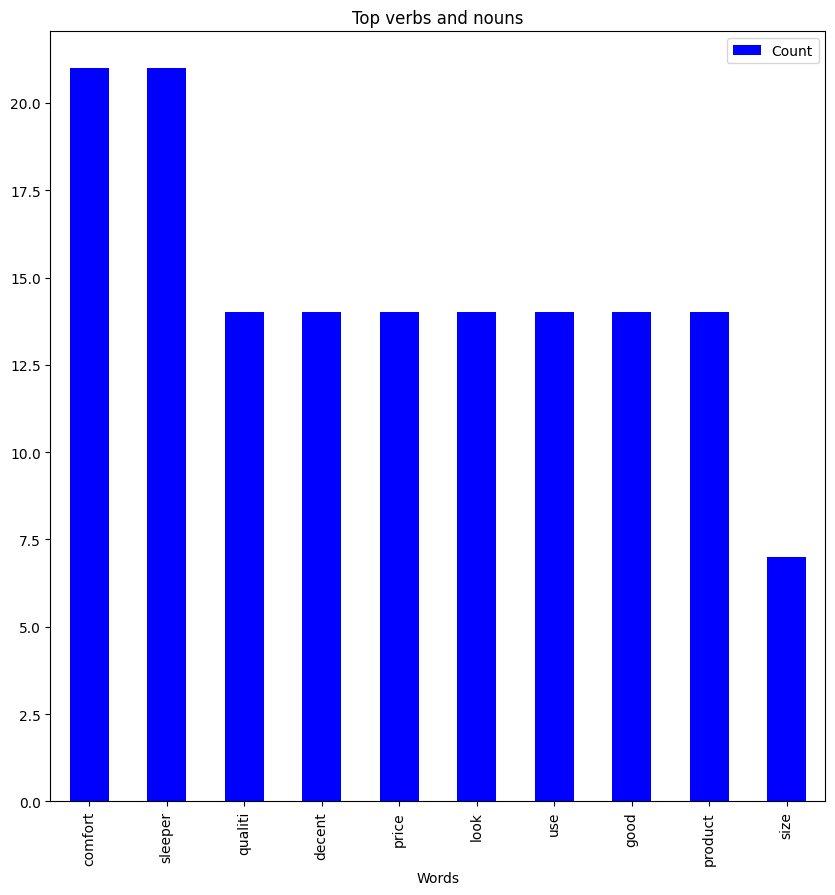

In [57]:
DF[0:10].plot.bar(x='Words', figsize=(10,10), title='Top verbs and nouns',color='blue')

In [58]:
rating_counts = Data["rating"].value_counts()

In [59]:
rating_counts

4.0    42
3.0    21
5.0     7
Name: rating, dtype: int64

In [60]:
Data['rating']

0     4.0
1     4.0
2     4.0
3     4.0
4     4.0
     ... 
65    4.0
66    3.0
67    3.0
68    3.0
69    5.0
Name: rating, Length: 70, dtype: float64

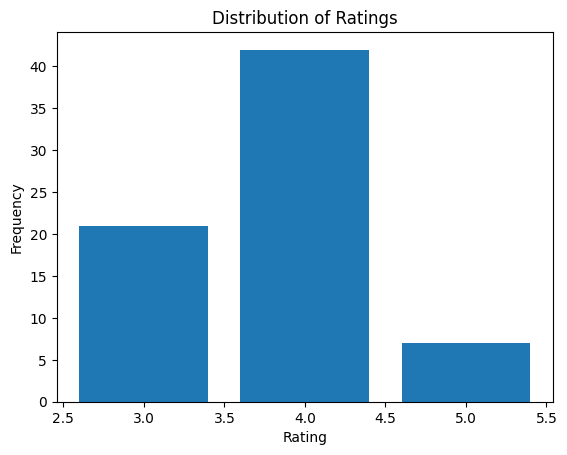

In [61]:
# Plot a bar chart
plt.bar(x=rating_counts.index, height=rating_counts.values)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Ratings")
plt.show()

In [62]:
cv.get_feature_names_out()

array(['ago', 'awesom', 'best', 'bestest', 'brand', 'build', 'comfort',
       'daili', 'decent', 'dislik', 'expect', 'explaini', 'fit', 'good',
       'goodrelax', 'goof', 'light', 'lightweight', 'look', 'money',
       'one', 'overal', 'price', 'product', 'purchas', 'qualiti',
       'qualitygood', 'rang', 'satisfi', 'size', 'sleeper', 'slipper',
       'spent', 'still', 'use', 'wear', 'weight', 'worth', 'year'],
      dtype=object)

In [63]:
cv.analyzer

'word'

In [64]:
CountVector=pd.DataFrame(a,columns=cv.get_feature_names_out())

In [65]:
CountVector

,ago,awesom,best,bestest,brand,build,comfort,daili,decent,dislik,...,size,sleeper,slipper,spent,still,use,wear,weight,worth,year
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,1,1,2,0,...,0,0,0,0,0,1,1,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,2,0,0,1,1,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
67,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
68,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## TF-IDF

In [66]:
b=np.array(Data["body_en"])

In [67]:
tv=TfidfVectorizer()
b=tv.fit_transform(b).toarray()
tv.vocabulary_

{'size': 29,
 'goodrelax': 14,
 'brand': 4,
 'qualiti': 25,
 'decent': 8,
 'price': 22,
 'look': 18,
 'wear': 35,
 'fit': 12,
 'expect': 10,
 'comfort': 6,
 'daili': 7,
 'use': 34,
 'sleeper': 30,
 'good': 13,
 'explaini': 11,
 'purchas': 24,
 'one': 20,
 'year': 38,
 'ago': 0,
 'still': 33,
 'goof': 15,
 'best': 2,
 'lightweight': 17,
 'awesom': 1,
 'satisfi': 28,
 'qualitygood': 26,
 'product': 23,
 'bestest': 3,
 'slipper': 31,
 'build': 5,
 'overal': 21,
 'rang': 27,
 'worth': 37,
 'money': 19,
 'spent': 32,
 'dislik': 9,
 'light': 16,
 'weight': 36}

In [68]:
TFIDF=pd.DataFrame(b,columns=tv.get_feature_names_out())
TFIDF

,ago,awesom,best,bestest,brand,build,comfort,daili,decent,dislik,...,size,sleeper,slipper,spent,still,use,wear,weight,worth,year
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.288176,0.000000,0.196597,0.288176,0.576352,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.231269,0.288176,0.000000,0.000000,0.000000
2,0.290322,0.000000,0.290322,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.465981,0.000000,0.000000,0.290322,0.232990,0.000000,0.000000,0.000000,0.290322
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.468669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.826077,0.000000,0.000000,0.000000,0.000000,0.563558,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
66,0.000000,0.000000,0.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
67,0.000000,0.000000,0.000000,0.000000,0.000000,0.355062,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.355062,0.000000,0.000000,0.000000,0.000000,0.355062,0.000000
68,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [69]:
TFIDF.head(5)

,ago,awesom,best,bestest,brand,build,comfort,daili,decent,dislik,...,size,sleeper,slipper,spent,still,use,wear,weight,worth,year
0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.707107,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
1,0.000000,0.000000,0.000000,0.0,0.288176,0.0,0.196597,0.288176,0.576352,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.231269,0.288176,0.0,0.0,0.000000
2,0.290322,0.000000,0.290322,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.465981,0.0,0.0,0.290322,0.232990,0.000000,0.0,0.0,0.290322
3,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.468669,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
4,0.000000,0.826077,0.000000,0.0,0.000000,0.0,0.563558,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000


## Sentimental Analysis

In [70]:
affin=Data["body_en"]

In [71]:
affin

0                                        size goodrelax
1     brand qualiti decent price look decent wear fi...
2     sleeper good explaini purchas one year ago sti...
3                         good look lightweight sleeper
4                                        awesom comfort
                            ...                        
65                          satisfi qualitygood product
66                                      bestest slipper
67    build qualiti overal product price rang worth ...
68                                               dislik
69                                 light weight comfort
Name: body_en, Length: 70, dtype: object

### Vader Lexicon

In [72]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [73]:
#from nltk.sentiment.vader import SentimentIntensityAnalyzer as sia

In [74]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [75]:
def get_vader_sentiment(letter):

  sia=SentimentIntensityAnalyzer()
  # create text blob object of passed tweet text
  analysis=sia.polarity_scores(letter)
  # set sentiment
  if analysis["compound"]>0:
    return "Satisfied"
  elif analysis["compound"]<0:
    return "Not satisfied"
  else:
    return "neutral"

In [76]:
Emotion=pd.DataFrame()

In [77]:
Emotion["sentiment"]=Data["body_en"].apply(get_vader_sentiment)

In [78]:
Data["Sentiment"] = Data["body_en"].apply(get_vader_sentiment)

In [79]:
sia=SentimentIntensityAnalyzer()

In [80]:
Data['scores']=Data['body_en'].apply(lambda letter: sia.polarity_scores(letter))

In [81]:
Data['compound']=Data['scores'].apply(lambda scores: scores['compound'])

In [82]:
Data['comp_score'] = Data['compound'].apply(lambda comp: 'Satisfied' if comp > 0 else ('Not satisfied' if comp < 0 else 'neutral'))

In [83]:
Data['scores']

0     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1     {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp...
2     {'neg': 0.0, 'neu': 0.585, 'pos': 0.415, 'comp...
3     {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp...
4     {'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'comp...
                            ...                        
65    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
66    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
67    {'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'comp...
68    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
69    {'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'comp...
Name: scores, Length: 70, dtype: object

In [84]:
Data['compound']

0     0.0000
1     0.6124
2     0.7964
3     0.4404
4     0.3612
       ...  
65    0.0000
66    0.0000
67    0.2263
68    0.0000
69    0.3612
Name: compound, Length: 70, dtype: float64

In [85]:
Data.index

RangeIndex(start=0, stop=70, step=1)

Text(0.5, 1.0, 'Emotion plot for each Customer')

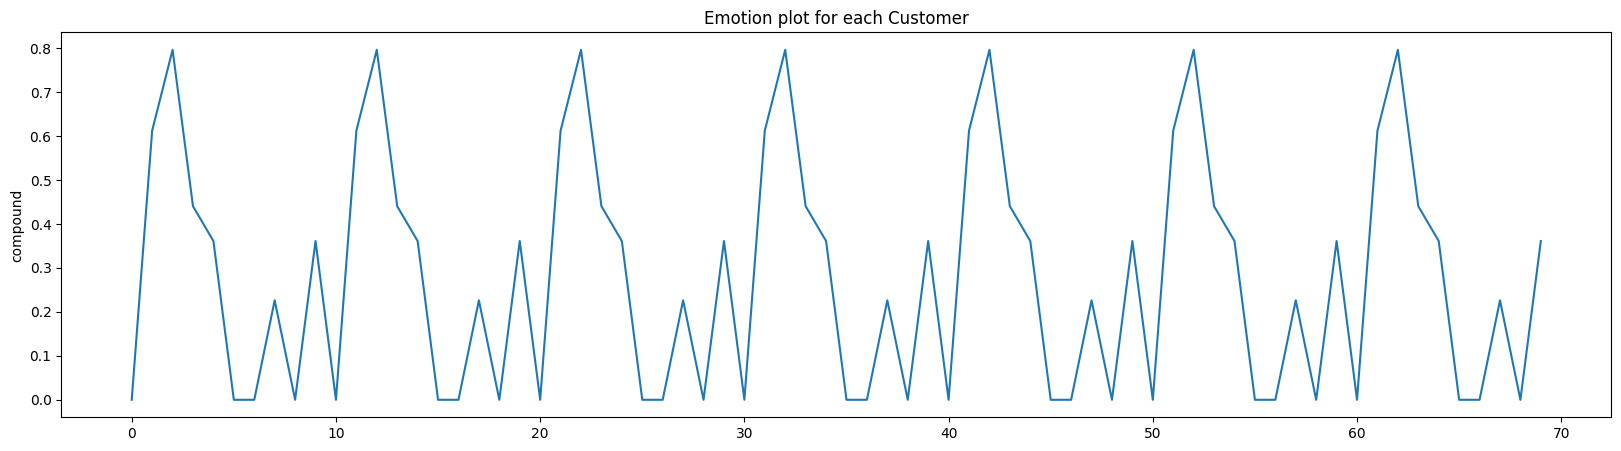

In [86]:
plt.figure(figsize=(20,5))
sns.lineplot(y='compound',x=Data.index,data=Data)
plt.title("Emotion plot for each Customer")

In [87]:
Data.head(14)

,title,rating,body_en,Sentiment,scores,compound,comp_score
0,4.0 out of 5 stars\nNice product 👍 lov it,4.0,size goodrelax,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
1,4.0 out of 5 stars\nServes the purpose,4.0,brand qualiti decent price look decent wear fi...,Satisfied,"{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp...",0.6124,Satisfied
2,4.0 out of 5 stars\nThis was the best I ever p...,4.0,sleeper good explaini purchas one year ago sti...,Satisfied,"{'neg': 0.0, 'neu': 0.585, 'pos': 0.415, 'comp...",0.7964,Satisfied
3,4.0 out of 5 stars\nSo light waight sleeper s,4.0,good look lightweight sleeper,Satisfied,"{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp...",0.4404,Satisfied
4,4.0 out of 5 stars\n#sparx,4.0,awesom comfort,Satisfied,"{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'comp...",0.3612,Satisfied
5,4.0 out of 5 stars\nWorth for money,4.0,satisfi qualitygood product,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
6,3.0 out of 5 stars\nNot the bestest of slippers,3.0,bestest slipper,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
7,3.0 out of 5 stars\nAfter 3 Weeks,3.0,build qualiti overal product price rang worth ...,Satisfied,"{'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'comp...",0.2263,Satisfied
8,3.0 out of 5 stars\nSize is very large,3.0,dislik,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
9,5.0 out of 5 stars\nGood for rough use,5.0,light weight comfort,Satisfied,"{'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'comp...",0.3612,Satisfied


In [88]:
Emotion.head(10)

,sentiment
0,neutral
1,Satisfied
2,Satisfied
3,Satisfied
4,Satisfied
5,neutral
6,neutral
7,Satisfied
8,neutral
9,Satisfied


In [93]:
sentiment_data=Emotion['sentiment']

In [94]:
sentiment_data

0       neutral
1     Satisfied
2     Satisfied
3     Satisfied
4     Satisfied
        ...    
65      neutral
66      neutral
67    Satisfied
68      neutral
69    Satisfied
Name: sentiment, Length: 70, dtype: object

In [95]:
sentiment_counts = pd.Series(sentiment_data).value_counts()

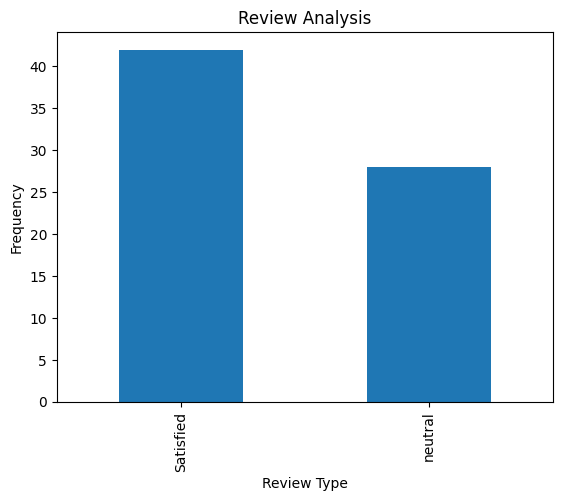

In [96]:
ax = sentiment_counts.plot.bar()
ax.set_xlabel('Review Type')
ax.set_ylabel('Frequency')
ax.set_title('Review Analysis')
plt.show()

In [97]:
print(accuracy_score(Data["Sentiment"],Data['comp_score']))

1.0


## Word Cloud

In [98]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

In [99]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off");

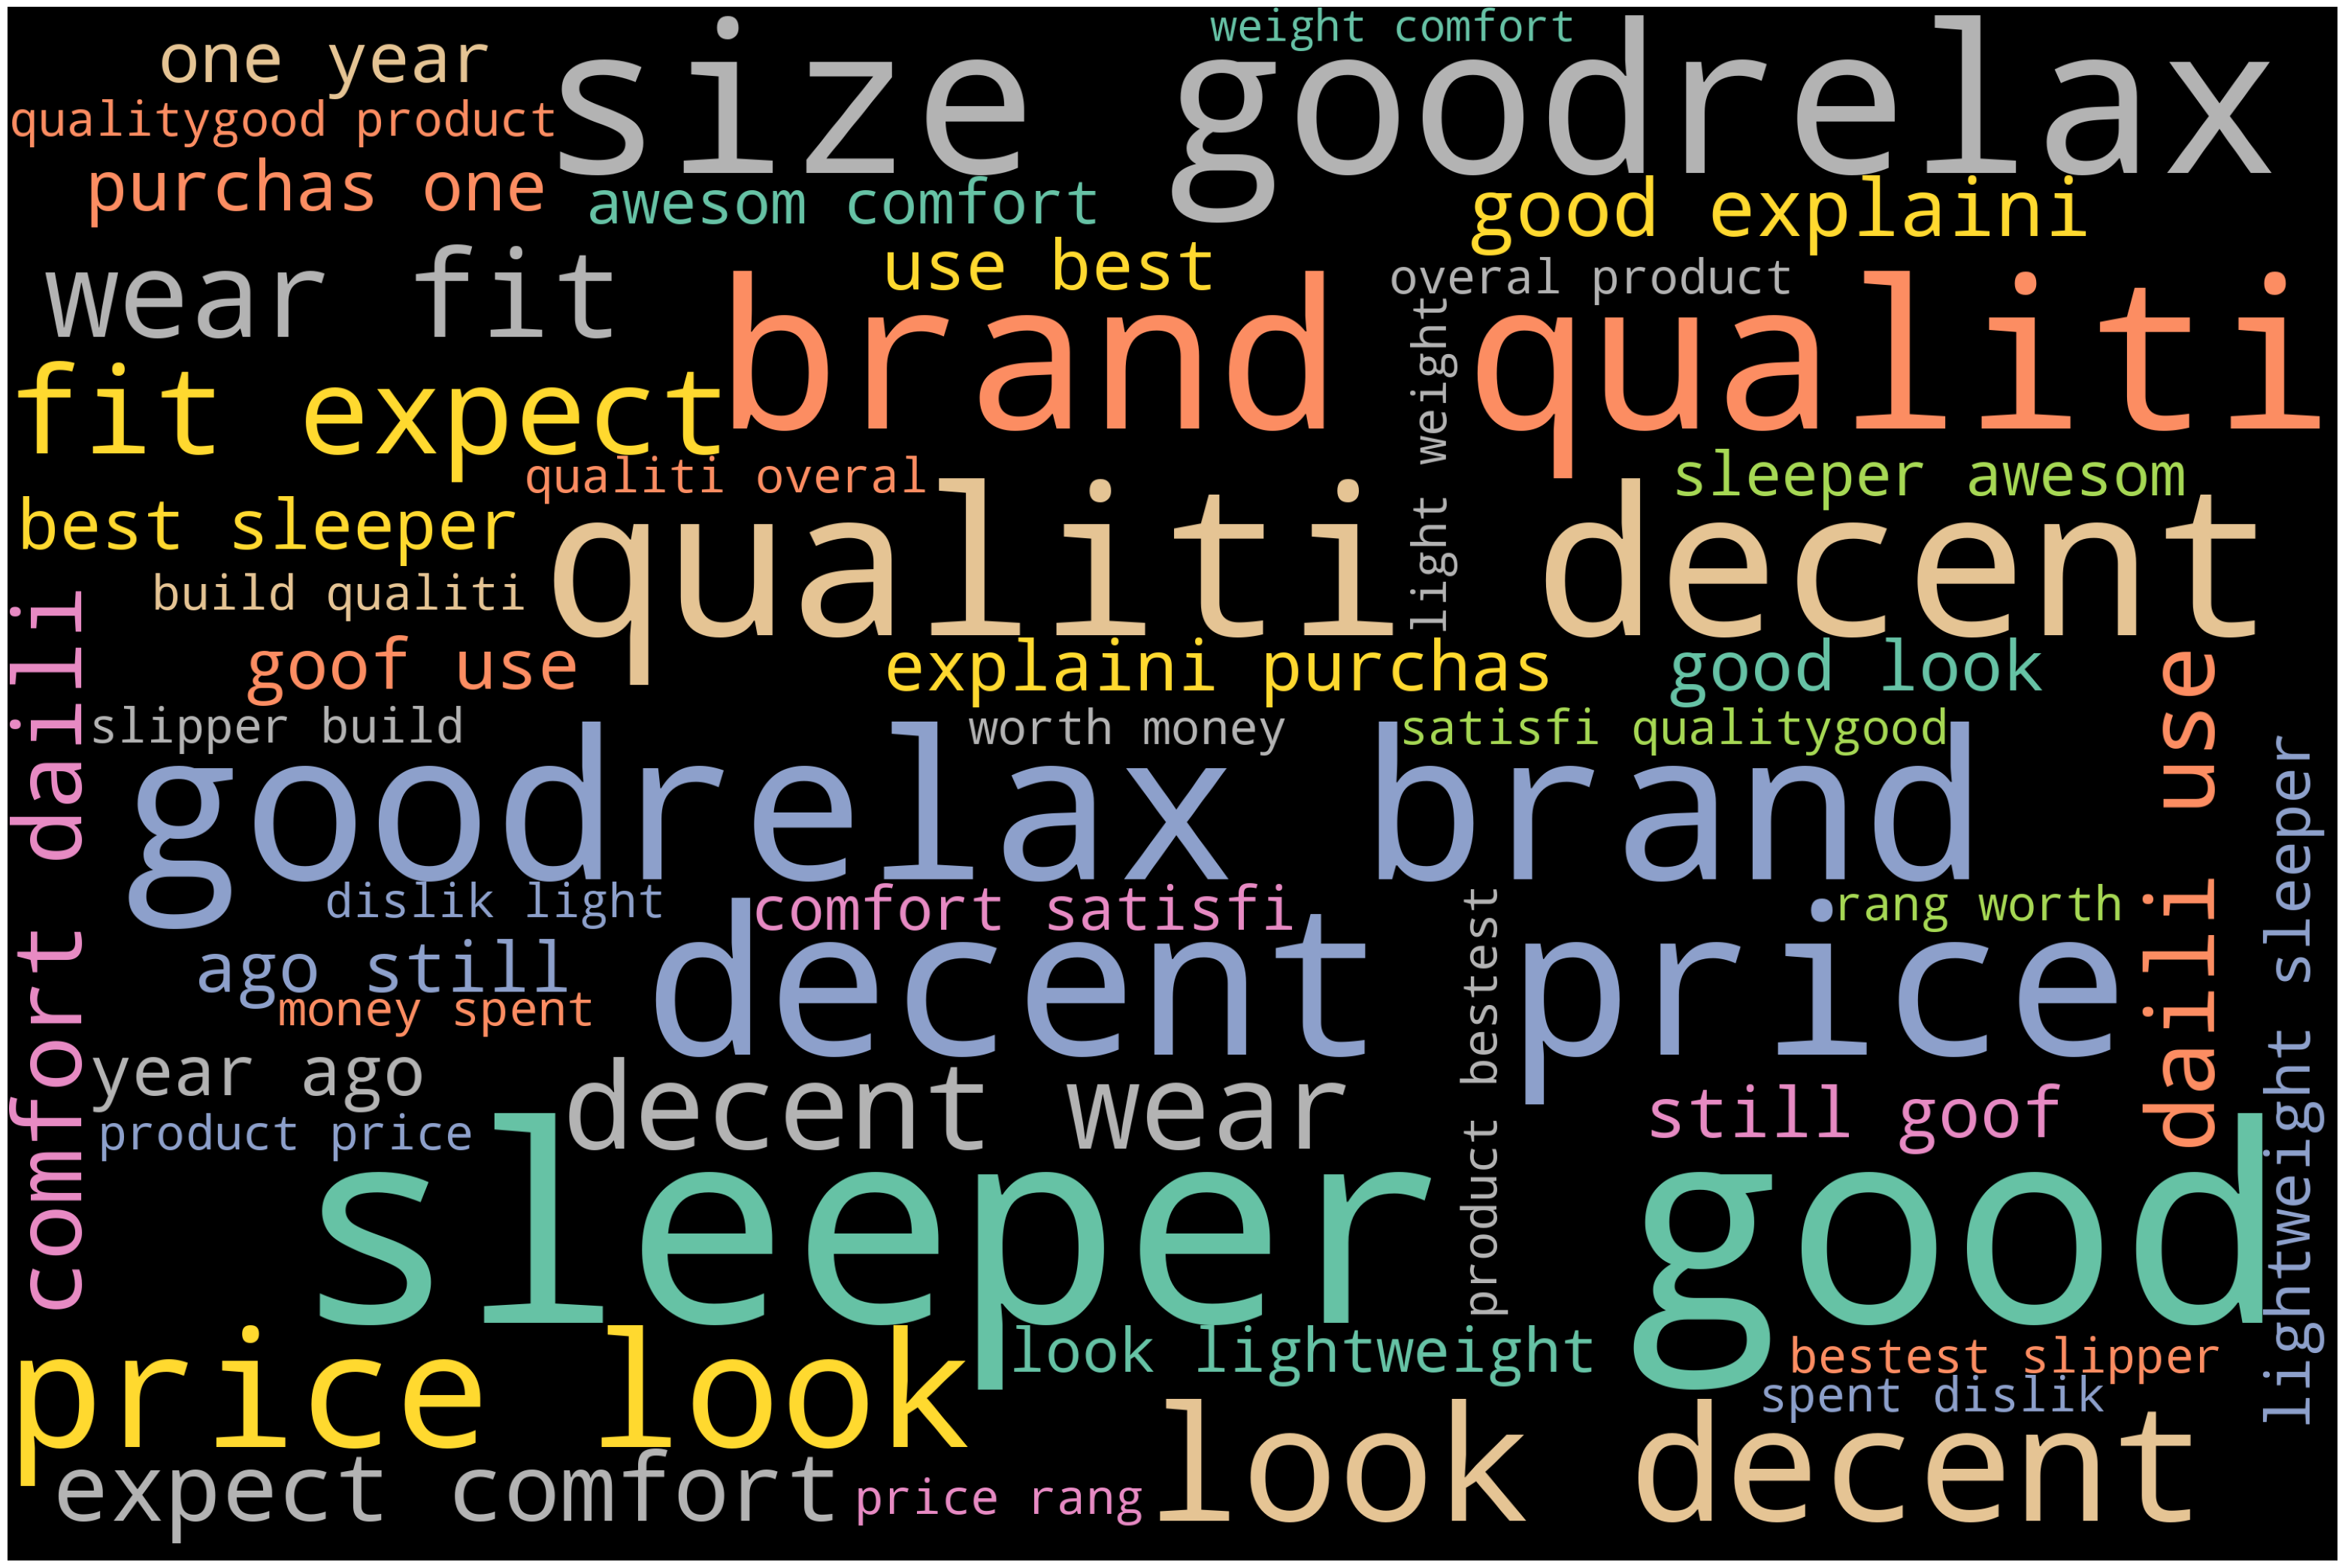

In [100]:
word = np.array(Data["body_en"])
word = word.astype(str)  # convert to string type
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=3000, height=2000, background_color='black', max_words=100, colormap='Set2', stopwords=stopwords).generate(' '.join(word))
plot_cloud(wordcloud)

#### Most of the customers given good review

## MODEL BUILDING

In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns
import statsmodels.api as sm

In [102]:
label=LabelEncoder()
score=label.fit_transform(Data["comp_score"])

In [103]:
X_train, X_test, y_train, y_test = train_test_split(b ,score, test_size = 0.3)

In [104]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.82607661, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.35506248,
        0.        ],
       [0.29032154, 0.        , 0.29032154, ..., 0.        , 0.        ,
        0.29032154],
       [0.        , 0.82607661, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [105]:
y_train

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0])

In [106]:
models=[DecisionTreeClassifier(random_state=10),LogisticRegression(),RandomForestClassifier(n_estimators=100)]
for model in models:
    model.fit(X_train,y_train)
    y_test_pred=model.predict(X_test)
    print(model,"accuracy ::",accuracy_score(y_test,y_test_pred))
    print(classification_report(y_test,y_test_pred))
    print(confusion_matrix(y_test,y_test_pred))
    print("=="*10)
    print()

DecisionTreeClassifier(random_state=10) accuracy :: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         9

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

[[12  0]
 [ 0  9]]

LogisticRegression() accuracy :: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         9

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

[[12  0]
 [ 0  9]]

RandomForestClassifier() accuracy :: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         9

    accu

#### All the models are performing very well